In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('final_dataset.csv')
df.head()

,SB,Date,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,winnor_season_point_allow,winnor_end_streak,Winning_streak,Losing_streak,loser_season_winning_pct,loser_season_point_score,loser_season_point_allow,loser_end_streak,Winning_streak.1,Losing_streak.1
0,I,15-Jan-67,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,163,W5,5,0,0.846,448,276,W3,3,0
1,II,14-Jan-68,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,209,L2,0,2,0.929,468,233,W10,10,0
2,III,12-Jan-69,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,280,W4,4,0,0.929,402,144,W8,8,0
3,IV,11-Jan-70,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,177,L1,0,1,0.857,379,133,L1,0,1
4,V,17-Jan-71,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,234,W4,4,0,0.714,299,221,W5,5,0


In [65]:
df.shape

(54, 36)

In [66]:
df.columns

Index(['SB', 'Date', 'Attendance', 'QB  Winner', 'Coach Winner', 'Winner',
       'Winning Pts', 'QB Loser', 'Coach Loser', 'Loser', 'Losing Pts', 'MVP',
       'Stadium', 'City', 'State', 'Point Difference', 'temperature',
       'in/ out', 'Average Viewers', 'Total Viewers', 'TV_rating', 'TV_share',
       '30-sec Ads cost', 'competitive_score', 'winnor_season_winning_pct',
       'winnor_season_point_score', 'winnor_season_point_allow',
       'winnor_end_streak', 'Winning_streak', 'Losing_streak',
       'loser_season_winning_pct', 'loser_season_point_score',
       'loser_season_point_allow', 'loser_end_streak', 'Winning_streak.1',
       'Losing_streak.1'],
      dtype='object')

In [67]:
"""
Q1: General information about the history of Super Bowls.
"""
df1 = df[['SB', 'Attendance', 'QB  Winner', 'Coach Winner', 'Winner', 'Loser', 'MVP', 'Stadium', 'City', \
          'State', 'Point Difference']]

In [68]:
"""
What are the top five stadiums that hosted the most number of Super Bowls? 
And what was the average point difference for these top five stadiums?
"""
new_df1 = df1.groupby(['Stadium', 'City', 'State'])['Point Difference'].agg(['count', 'mean']).sort_values(by='count', \
                                                                                                 ascending=False).head()
new_df1.columns = ['Number of SB hosted', 'Average Point Difference']
new_df1

,,,Number of SB hosted,Average Point Difference
Stadium,City,State,,
Louisiana Superdome,New Orleans,Louisiana,5,23.000000
Orange Bowl,Miami,Florida,5,7.800000
Rose Bowl,Pasadena,California,5,18.800000
Tulane Stadium,New Orleans,Louisiana,3,15.666667
Joe Robbie Stadium,Miami Gardens,Florida,2,13.500000


In [69]:
"""
Who are the top 5 QBs that have won the most super bowls? 
And what was the average point difference for their wins?
"""
new_df1_ = df1.groupby('QB  Winner')['Point Difference'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head()
new_df1_.columns = ['Number of SB wins','Average Point Difference']
new_df1_

,Number of SB wins,Average Point Difference
QB Winner,,
Tom Brady,6,4.833333
Terry Bradshaw,4,7.500000
Troy Aikman,3,20.666667
Joe Montana,3,18.000000
Eli Manning,2,3.500000


In [70]:
"""
Who did the most Super Bowl winning QB played against? 
Who is the MVP in those Super Bowls? 
And where did he won those Super Bowls?
"""
df1[df1['QB  Winner']=='Tom Brady'][['SB','Coach Winner','Loser','MVP','Stadium','City','State']].set_index('SB')

,Coach Winner,Loser,MVP,Stadium,City,State
SB,,,,,,
XXXVI,Bill Belichick,St. Louis Rams,Tom Brady,Louisiana Superdome,New Orleans,Louisiana
XXXVIII,Bill Belichick,Carolina Panthers,Tom Brady,Reliant Stadium,Houston,Texas
XXXIX,Bill Belichick,Philadelphia Eagles,Deion Branch,Alltel Stadium,Jacksonville,Florida
XLIX,Bill Belichick,Seattle Seahawks,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
LI,Bill Belichick,Atlanta Falcons,Tom Brady,NRG Stadium,Houston,Texas
LIII,Bill Belichick,Los Angeles Rams,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia


In [71]:
"""
Q2:Investigate whether indoor or outdoor has an influence on 
the point difference or the number of attendees and whether temperature has some impact on the point 
difference or the number of attendees.
"""
df2 = df[['SB', 'Attendance', 'Point Difference', 'temperature',
       'in/ out']]
df2.set_index('SB').head()

,Attendance,Point Difference,temperature,in/ out
SB,,,,
I,61946,25,72,outdoors
II,75546,19,68,outdoors
III,75389,9,73,outdoors
IV,80562,16,61,outdoors
V,79204,3,70,outdoors


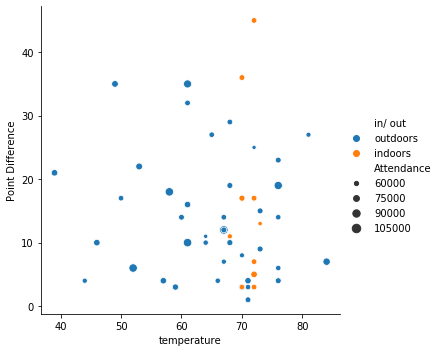

In [72]:
"""
Trying to find patterns for the influence of the environment on attendance and point difference
"""
sns_plot1 = sns.relplot(x="temperature",y="Point Difference",data=df2, kind="scatter",size="Attendance", hue='in/ out')
sns_plot1.savefig('envir1.png')

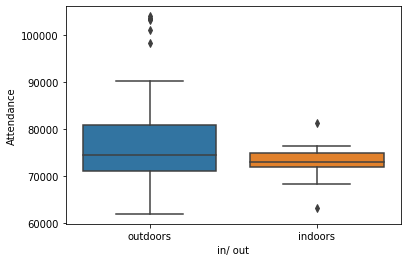

In [73]:
"""
Does indoor or outdoor have influence on the number of attendance?
Indoor stadiums can contain wide range of audience with several outliers.
"""
fig, ax = plt.subplots()
sns.boxplot(x=df2['in/ out'],y=df2['Attendance'], ax=ax)
plt.savefig('envir2.png')

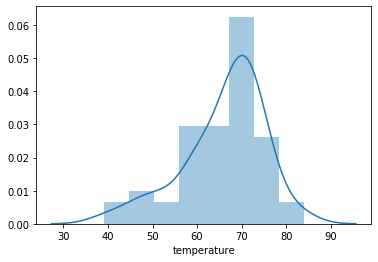

In [74]:
# plot the histogram of the temperature in order to find proper range for each bin
sns.distplot(df2.temperature)

In [75]:
df2['Temp_group'] = pd.cut(df2.temperature,
                     bins=[0, 50, 65, 75, 85],
                     labels=["Freezing", "Cold", "Comfortable", "Hot"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df2.head()

,SB,Attendance,Point Difference,temperature,in/ out,Temp_group
0,I,61946,25,72,outdoors,Comfortable
1,II,75546,19,68,outdoors,Comfortable
2,III,75389,9,73,outdoors,Comfortable
3,IV,80562,16,61,outdoors,Cold
4,V,79204,3,70,outdoors,Comfortable


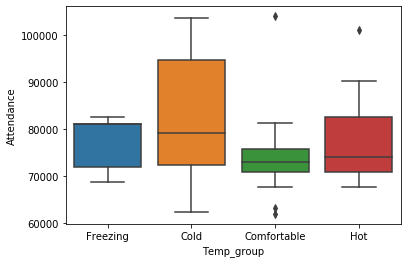

In [77]:
"""
Does temperature have influence on the number of attendance?
Temperature doesn't seem to have huge influence on the number of attendance.
"""
fig, ax = plt.subplots()
sns.boxplot(x=df2['Temp_group'],y=df2['Attendance'], ax=ax)
plt.savefig('envir3.png')

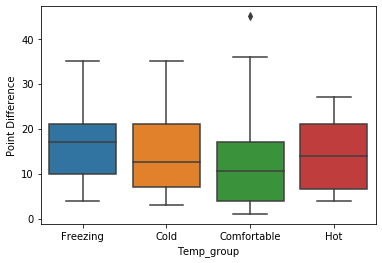

In [78]:
"""
Does temperature have influence on Point Difference?
Temperature seems to have some influence on the point difference. Comfortable temperature environment are more competitive
"""
fig, ax = plt.subplots()
sns.boxplot(x=df2['Temp_group'],y=df2['Point Difference'], ax=ax)
plt.savefig('envir4.png')

In [79]:
envir_vs_performance=df2.groupby(['in/ out','Temp_group'])[['Attendance', 'Point Difference']].mean()

In [80]:
envir_vs_performance.fillna("No data in this category")

Attendance          Point Difference
in/ out  Temp_group                                                     
indoors  Freezing     No data in this category  No data in this category
         Cold         No data in this category  No data in this category
         Comfortable                   72849.4                   15.8182
         Hot          No data in this category  No data in this category
outdoors Freezing                      77017.8                      17.4
         Cold                          82495.4                   15.0714
         Comfortable                   74638.8                   10.5294
         Hot                           78568.4                   14.2857

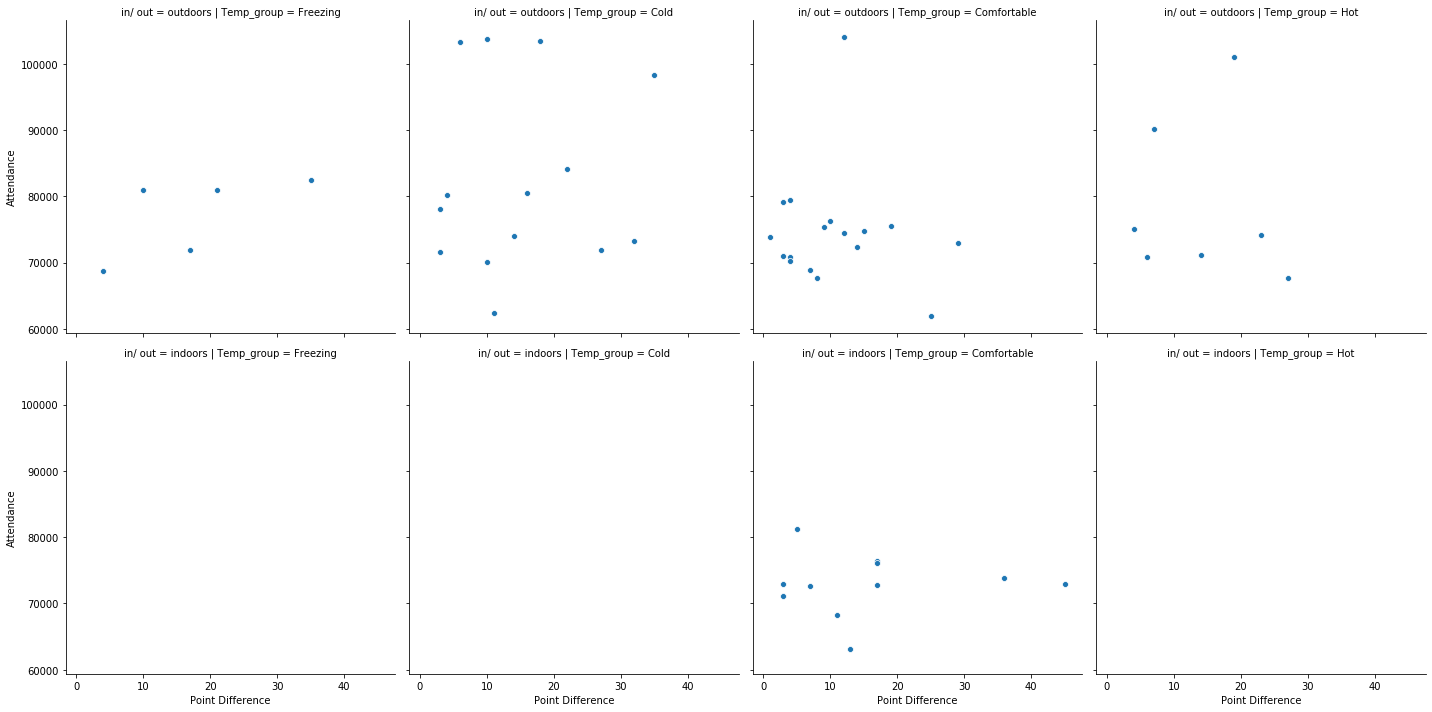

In [81]:
"""
Trying to find patterns for the influence of the environment on attendance and point difference
"""
sns.relplot(x="Point Difference", y="Attendance",
                col="Temp_group", row="in/ out", data=df2)

In [82]:
"""
Q3:Investigate whether the competitiveness of the game (calculated by the 
average point difference for every quarter) has the influence on the television ratings. 
competitive_score was converted to a categorical variable. 
Data for 'Average Viewers', 'Total Viewers', 'TV_rating', 'TV_share' were scraped from the web.
"""
df3 = df[['SB', 'Point Difference', 'Average Viewers', 'Total Viewers', 'TV_rating', 'TV_share','competitive_score']]
# df3.dtypes
df3.set_index('SB').head()

,Point Difference,Average Viewers,Total Viewers,TV_rating,TV_share,competitive_score
SB,,,,,,
I,25,25590000,37750000,33.0,40,7.75
II,19,39120000,51300000,36.8,68,4.75
III,9,41660000,54500000,36.0,70,4.25
IV,16,44270000,59200000,39.4,69,4.00
V,3,46040000,58500000,39.9,75,4.25


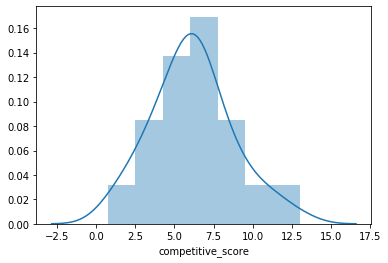

In [83]:
sns.distplot(df3.competitive_score)

In [84]:
df3['comp_group'] = pd.cut(df3.competitive_score,
                     bins=[0, 4.5, 6, 10, 13],
                     labels=["Highly Competitive", "Comopetitive", " Not Comopetitive", "No match"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
df3.head()

,SB,Point Difference,Average Viewers,Total Viewers,TV_rating,TV_share,competitive_score,comp_group
0,I,25,25590000,37750000,33.0,40,7.75,Not Comopetitive
1,II,19,39120000,51300000,36.8,68,4.75,Comopetitive
2,III,9,41660000,54500000,36.0,70,4.25,Highly Competitive
3,IV,16,44270000,59200000,39.4,69,4.00,Highly Competitive
4,V,3,46040000,58500000,39.9,75,4.25,Highly Competitive


In [86]:
df3.groupby('comp_group')[['TV_rating','TV_share']].mean()

,TV_rating,TV_share
comp_group,,
Highly Competitive,41.686667,67.400000
Comopetitive,44.446154,68.692308
Not Comopetitive,43.650000,65.590909
No match,43.575000,65.250000


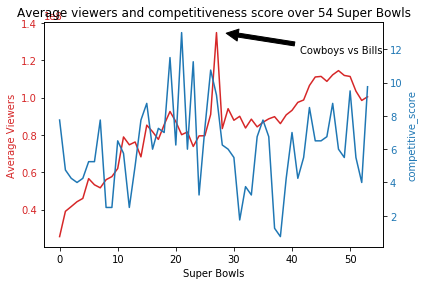

In [87]:
"""
Plot viewers against competitiveness of the game
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Super Bowls')
ax1.set_ylabel('Average Viewers', color=color)
ax1.plot(df3['Average Viewers'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('competitive_score', color=color)  # already handled the x-label with ax1
ax2.plot(df3['competitive_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Average viewers and competitiveness score over 54 Super Bowls")
ax2.annotate('Cowboys vs Bills',
            xy=(28, 13), xycoords='data',
            xytext=(1, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.show()

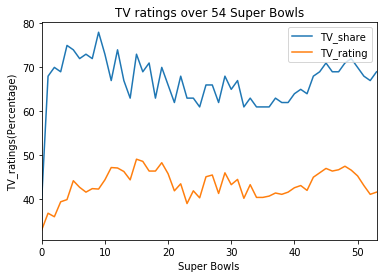

In [88]:
"""
plot the trend of tv ratings over the years
"""
df3['TV_share'].plot()
df3['TV_rating'].plot()

plt.xlabel('Super Bowls')
plt.ylabel('TV_ratings(Percentage)')
plt.title("TV ratings over 54 Super Bowls")
plt.legend(loc="upper right")
# plt.savefig('tv_rating.png')

In [89]:
"""
Q4:Investigate the strength of the correlation between TV ratings ('Average Viewers', 'Total Viewers', 'TV_rating', 
'TV_share') and '30-sec Ads cost'. Data for 'Average Viewers', 'Total Viewers', 'TV_rating', 'TV_share', 
'30-sec Ads cost' were scraped from the web.
"""
df4 = df[['SB', 'Average Viewers', 'Total Viewers', 'TV_rating', 'TV_share',
       '30-sec Ads cost']]
df4.set_index('SB').head()
# df4.dtypes

,Average Viewers,Total Viewers,TV_rating,TV_share,30-sec Ads cost
SB,,,,,
I,25590000,37750000,33.0,40,40000
II,39120000,51300000,36.8,68,54500
III,41660000,54500000,36.0,70,55000
IV,44270000,59200000,39.4,69,78200
V,46040000,58500000,39.9,75,72500


In [90]:
aList = []
for item in list(df4)[1:-1]:
    aList.append(["30-sec Ads cost and " + item, df4['30-sec Ads cost'].corr(df4[item])])
corr = 0
variable = ''
for member in aList:
    if member[1] > corr:
        corr = member[1]
        variable = member[0]
variable, corr

('30-sec Ads cost and Average Viewers', 0.7130287810732319)

In [91]:
aList

[['30-sec Ads cost and Average Viewers', 0.7130287810732319],
 ['30-sec Ads cost and Total Viewers', 0.4336572753982563],
 ['30-sec Ads cost and TV_rating', 0.14107053592582847],
 ['30-sec Ads cost and TV_share', 0.0005375190453214912]]

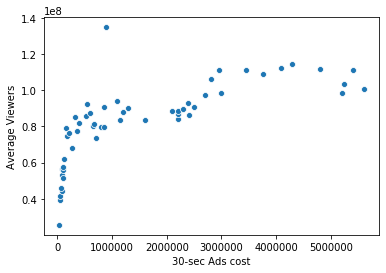

In [92]:
"""
There is a correlation between the average viewers and the cost of 30-second ads.
Confirms that marketers spent money in the right place to reach more customers
"""
sns.scatterplot(x="30-sec Ads cost", y="Average Viewers", data=df4)

In [93]:
"""
Q5:Investigate the difference between the the winning team’s season performance and the losing team's season performance. 
I selected season winning percentage, end of the season streak, points scored, and points against to be the parameters 
for this analysis.  
"""
df5 = df[['SB', 'winnor_season_winning_pct',
       'winnor_season_point_score', 'winnor_season_point_allow',
       'Winning_streak', 'Losing_streak',
       'loser_season_winning_pct', 'loser_season_point_score',
       'loser_season_point_allow', 'Winning_streak.1',
       'Losing_streak.1']]
df5.set_index('SB').head()

,winnor_season_winning_pct,winnor_season_point_score,winnor_season_point_allow,Winning_streak,Losing_streak,loser_season_winning_pct,loser_season_point_score,loser_season_point_allow,Winning_streak.1,Losing_streak.1
SB,,,,,,,,,,
I,0.857,335,163,5,0,0.846,448,276,3,0
II,0.692,332,209,0,2,0.929,468,233,10,0
III,0.786,419,280,4,0,0.929,402,144,8,0
IV,0.786,359,177,0,1,0.857,379,133,0,1
V,0.846,321,234,4,0,0.714,299,221,5,0


In [94]:
df5.dtypes

SB                            object
winnor_season_winning_pct    float64
winnor_season_point_score      int64
winnor_season_point_allow      int64
Winning_streak                 int64
Losing_streak                  int64
loser_season_winning_pct     float64
loser_season_point_score       int64
loser_season_point_allow       int64
Winning_streak.1               int64
Losing_streak.1                int64
dtype: object

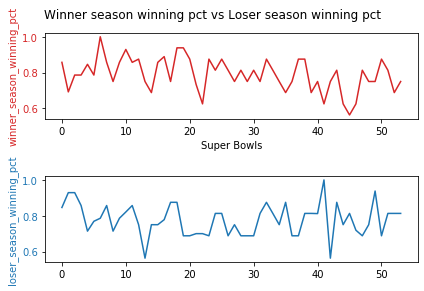

In [95]:
"""
Plot the trend of season winning percentage for both winning and losing teams
"""
fig, axs = plt.subplots(2)
fig.suptitle('Winner season winning pct vs Loser season winning pct')

color = 'tab:red'
axs[0].set_xlabel('Super Bowls')
axs[0].set_ylabel('winner_season_winning_pct', color=color)
axs[0].plot(df5['winnor_season_winning_pct'], color=color)
axs[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
axs[1].set_ylabel('loser_season_winning_pct', color=color)  # already handled the x-label with ax1
axs[1].plot(df5['loser_season_winning_pct'], color=color)
axs[1].tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [96]:
# df5.winnor_season_winning_pct.mean(), df5.loser_season_winning_pct.mean()
# df5.winnor_season_point_score.mean(), df5.loser_season_point_score.mean()
# df5.winnor_season_point_allow.mean(), df5.loser_season_point_allow.mean()
# df5.Winning_streak.mean(), df5['Winning_streak.1'].mean()
# df5.Losing_streak.mean(), df5['Losing_streak.1'].mean()

In [97]:
list(df5)

['SB',
 'winnor_season_winning_pct',
 'winnor_season_point_score',
 'winnor_season_point_allow',
 'Winning_streak',
 'Losing_streak',
 'loser_season_winning_pct',
 'loser_season_point_score',
 'loser_season_point_allow',
 'Winning_streak.1',
 'Losing_streak.1']

In [98]:
df5.loc['Average'] = [np.nan, df5['winnor_season_winning_pct'].mean(),df5['winnor_season_point_score'].mean(),\
                    df5['winnor_season_point_allow'].mean(),\
                    df5['Winning_streak'].mean(),df5['Losing_streak'].mean(),df5['loser_season_winning_pct'].mean(),\
                    df5['loser_season_point_score'].mean(),\
                     df5['loser_season_point_allow'].mean(),\
                    df5['Winning_streak.1'].mean(), df5['Losing_streak.1'].mean()]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [99]:
df5.tail(1).transpose()

,Average
SB,NaN
winnor_season_winning_pct,0.790315
winnor_season_point_score,397.704
winnor_season_point_allow,251.593
Winning_streak,3.14815
Losing_streak,0.277778
loser_season_winning_pct,0.777056
loser_season_point_score,402.574
loser_season_point_allow,269.685
Winning_streak.1,2.83333


In [100]:
winner_season_stats = df5.tail(1).transpose().iloc[1:6,:]
winner_season_stats.reset_index(inplace=True)

In [101]:
loser_season_stats = df5.tail(1).transpose().iloc[6:,:]
loser_season_stats.reset_index(inplace=True)

In [102]:
df6=pd.concat([winner_season_stats, loser_season_stats],axis=1)
df6

,index,Average,index,Average
0,winnor_season_winning_pct,0.790315,loser_season_winning_pct,0.777056
1,winnor_season_point_score,397.704,loser_season_point_score,402.574
2,winnor_season_point_allow,251.593,loser_season_point_allow,269.685
3,Winning_streak,3.14815,Winning_streak.1,2.83333
4,Losing_streak,0.277778,Losing_streak.1,0.333333


In [103]:
df6.set_index(pd.Index(['Winning pct','Point Score','Point Allow', 'Winning Streak','Losing Streak']), inplace=True)
df6

,index,Average,index,Average
Winning pct,winnor_season_winning_pct,0.790315,loser_season_winning_pct,0.777056
Point Score,winnor_season_point_score,397.704,loser_season_point_score,402.574
Point Allow,winnor_season_point_allow,251.593,loser_season_point_allow,269.685
Winning Streak,Winning_streak,3.14815,Winning_streak.1,2.83333
Losing Streak,Losing_streak,0.277778,Losing_streak.1,0.333333


In [104]:
df7 = df6.loc[:, 'Average']
df7

,Average,Average
Winning pct,0.790315,0.777056
Point Score,397.704,402.574
Point Allow,251.593,269.685
Winning Streak,3.14815,2.83333
Losing Streak,0.277778,0.333333


In [105]:
df7.columns = ['Winner','Loser']

In [106]:
df7

,Winner,Loser
Winning pct,0.790315,0.777056
Point Score,397.704,402.574
Point Allow,251.593,269.685
Winning Streak,3.14815,2.83333
Losing Streak,0.277778,0.333333
